<a href="https://colab.research.google.com/github/Rushikesh175/Dhoni-Prediction-System/blob/main/Dhoni_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import all the necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


Step 1: Understanding the dataset!

One contains data from the year 2007 to 2021.For better accuracy of our model, we used IPL players’ stats to analyze their performance from dataworld. This dataset contains details of every IPL player from the year 2016 – 2019.



Step 2: Data cleaning and formatting

In [ ]:
ipl = pd.read_csv('ipl_dataset.csv')
ipl.head()


,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0


In [ ]:
data = pd.read_csv('IPL Player Stats - 2016 till 2019.csv')
data.head()


,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,...,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,...,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,...,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,...,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,-,-,-,2,2


Now, we will merge both datasets.

After merging the columns and removing new unwanted columns, we have the following columns left. Here’s the modified dataset.

In [ ]:
ipl= ipl.drop(['Unnamed: 0','extras','match_id', 'runs_off_bat'],axis = 1)
new_ipl = pd.merge(ipl,data,left_on='striker',right_on='Player',how='left')
new_ipl.drop(['wicket_type', 'player_dismissed'],axis=1,inplace=True)
new_ipl.columns


Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'run', 'wickets', 'truns', 'y', 'Team',
       'Player', 'Tournament', 'Matches', 'Batting Innings', 'Not Out',
       'Runds Scored', 'Highest Score', 'Batting Average', 'Balls Faced',
       'Batting Strike Rate', '100', '50', '0', '4s', '6s', 'Bowling Innings',
       'Overs Bowled', 'Maidens Bowled', 'Runs Conceded', 'Wickets Taken',
       'Best Bowling Figures', 'Bowling Average', 'Bowling Economy Rate',
       'Bowling Strike Rate', '4+ Innings Wickets', '5+ Innings Wickets',
       'Catches Taken', 'Stumpings Made'],
      dtype='object')

There are various ways to fill null values in our dataset. Here I am simply replacing the categorical values which are nan with ‘.’

In [ ]:
str_cols = new_ipl.columns[new_ipl.dtypes==object]
new_ipl[str_cols] = new_ipl[str_cols].fillna('.')


Step 3: Encoding the categorical data to numerical values.

For the columns to be able to assist the model in the prediction, the values should make some sense to the computers. Since they  don’t have the ability to understand and draw inferences from the text, we need to encode the strings to numeric categorical values. While we may choose to do the process manually, the Scikit-learn library gives us an option to use LabelEncoder.

In [ ]:
a1 = new_ipl['venue'].unique()
a2 = new_ipl['batting_team'].unique()
a3 = new_ipl['bowling_team'].unique()
a4 = new_ipl['striker'].unique()
a5 = new_ipl['bowler'].unique()

def labelEncoding(data):
	dataset = pd.DataFrame(new_ipl)
	feature_dict ={}
	
	for feature in dataset:
		if dataset[feature].dtype==object:
			le = preprocessing.LabelEncoder()
			fs = dataset[feature].unique()
			le.fit(fs)
			dataset[feature] = le.transform(dataset[feature])
			feature_dict[feature] = le
			
	return dataset

labelEncoding(new_ipl)


,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,run,wickets,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,15,1,0.1,7,13,186,30,201,1.0,0.0,...,119,21,74,100,118,84,3,2,NaN,NaN
1,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,1.0,0.0
2,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,8.0,0.0
4,15,1,0.3,7,13,30,184,201,1.0,0.0,...,0,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85186,31,1,6.5,14,10,127,47,220,1.0,1.0,...,0,0,0,0,0,0,0,0,9.0,0.0
85187,31,1,6.5,14,10,127,47,220,1.0,1.0,...,0,0,0,0,0,0,0,0,7.0,0.0
85188,31,1,6.6,14,10,48,126,220,1.0,1.0,...,0,0,0,0,0,0,0,0,4.0,0.0
85189,31,1,6.6,14,10,48,126,220,1.0,1.0,...,0,0,0,0,0,0,0,0,10.0,0.0


Step 4: Feature Engineering and Selection

Our dataset contains multiple columns, but we can’t take these many inputs from users thus we have taken the selected amount of features as input and divided them into X and y. We will then divide our data into train sets and test set before using a machine learning algorithm.

In [ ]:
ip_dataset = new_ipl[['venue','innings', 'batting_team',
					'bowling_team', 'striker', 'non_striker',
					'bowler']]

b1 = ip_dataset['venue'].unique()
b2 = ip_dataset['batting_team'].unique()
b3 = ip_dataset['bowling_team'].unique()
b4 = ip_dataset['striker'].unique()
b5 = ip_dataset['bowler'].unique()
new_ipl.fillna(0,inplace=True)

features={}

for i in range(len(a1)):
	features[a1[i]]=b1[i]
for i in range(len(a2)):
	features[a2[i]]=b2[i]
for i in range(len(a3)):
	features[a3[i]]=b3[i]
for i in range(len(a4)):
	features[a4[i]]=b4[i]
for i in range(len(a5)):
	features[a5[i]]=b5[i]
	
features


{'A Chandila': 0,
 'A Chopra': 0,
 'A Choudhary': 1,
 'A Flintoff': 2,
 'A Kumble': 3,
 'A Mishra': 4,
 'A Mithun': 5,
 'A Mukund': 2,
 'A Nehra': 6,
 'A Singh': 7,
 'A Symonds': 8,
 'A Uniyal': 9,
 'A Zampa': 10,
 'AA Bilakhia': 4,
 'AA Chavan': 11,
 'AA Jhunjhunwala': 12,
 'AA Noffke': 13,
 'AB Agarkar': 14,
 'AB Dinda': 15,
 'AB McDonald': 16,
 'AB de Villiers': 7,
 'AC Blizzard': 8,
 'AC Gilchrist': 9,
 'AC Thomas': 17,
 'AC Voges': 18,
 'AD Hales': 10,
 'AD Mascarenhas': 19,
 'AD Mathews': 20,
 'AD Nath': 12,
 'AD Russell': 21,
 'AF Milne': 22,
 'AG Murtaza': 23,
 'AG Paunikar': 14,
 'AJ Finch': 24,
 'AJ Tye': 25,
 'AL Menaria': 26,
 'AM Nayar': 27,
 'AM Rahane': 18,
 'AM Salvi': 28,
 'AN Ahmed': 29,
 'AN Ghosh': 19,
 'AP Dole': 30,
 'AP Majumdar': 20,
 'AP Tare': 21,
 'AR Patel': 31,
 'AS Joseph': 32,
 'AS Rajpoot': 33,
 'AS Raut': 23,
 'AT Rayudu': 24,
 'Anand Rajan': 34,
 'Anirudh Singh': 25,
 'Ankit Sharma': 35,
 'Anureet Singh': 36,
 'Arun Jaitley Stadium': 0,
 'Avesh Khan': 

Step 4: Feature Engineering and Selection

Our dataset contains multiple columns, but we can’t take these many inputs from users thus we have taken the selected amount of features as input and divided them into X and y. We will then divide our data into train sets and test set before using a machine learning algorithm.

In [ ]:
X = new_ipl[['venue', 'innings','batting_team',
			'bowling_team', 'striker','bowler']].values
y = new_ipl['y'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)


Comparing these large numerical values by our model will be difficult so it is always a better choice to scale your data before processing it. Here we are using MinMaxScaler from sklearn.preprocessing which is recommended when dealing with deep learning.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 5: Building, Training & Testing the Model

Here comes the most exciting part of our project, Building our model! Firstly, we will import Sequential from tensorflow.keras.models Also, we will import Dense & Dropout from tensorflow.keras.layers as we will be using multiple layers.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping


EarlyStopping is used to avoid overfitting. What early stopping basically does is, it stops calculating the losses when ‘val_loss’ increases than ‘loss’. Val_loss curve should always be below val curve. When it is found that the difference between ‘val_loss’ and ‘loss’ is becomes constant, it stops training.

In [ ]:
 early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1, mode='min')
 model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test,y_test),callbacks=[early_stop] )

Epoch 1/400
1784/1784 [==============================] - 5s 3ms/step - loss: 892.7579 - val_loss: 255.9016
Epoch 2/400
1784/1784 [==============================] - 4s 2ms/step - loss: 616.7816 - val_loss: 231.3998
Epoch 3/400
1784/1784 [==============================] - 4s 2ms/step - loss: 550.9506 - val_loss: 217.8510
Epoch 4/400
1784/1784 [==============================] - 5s 3ms/step - loss: 504.2740 - val_loss: 211.3342
Epoch 5/400
1784/1784 [==============================] - 4s 2ms/step - loss: 465.7420 - val_loss: 196.1850
Epoch 6/400
1784/1784 [==============================] - 5s 3ms/step - loss: 438.5636 - val_loss: 206.2251
Epoch 7/400
1784/1784 [==============================] - 5s 3ms/step - loss: 412.9570 - val_loss: 187.7981
Epoch 8/400
1784/1784 [==============================] - 5s 3ms/step - loss: 387.2233 - val_loss: 190.0399
Epoch 9/400
1784/1784 [==============================] - 5s 3ms/step - loss: 368.3983 - val_loss: 172.5552
Epoch 10/400
1784/1784 [=============

Here, we have created 2 hidden layers and reduced the number of neurons as we want the final output to be 1. Then while compiling our model we used adam optimizer and loss as mean squared error.  Now, let’s start training our model with epochs=400.

In [ ]:
model = Sequential()

model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


After the training is complete, let us visualize our model’s losses.

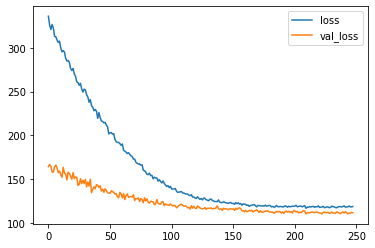

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


Step 6: Predictions!

Here we come to the final part of our project where we will be predicting our X_test. Then we will create a dataframe that would show us the actual values and the predicted values.

In [ ]:
predictions = model.predict(X_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)


,Predict,Actual
0,52.154774,54.0
1,48.635975,57.0
2,51.947353,38.0
3,56.424744,65.0
4,51.979038,42.0
5,51.884178,38.0
6,50.577961,55.0
7,54.795746,65.0
8,48.682568,53.0
9,51.543770,80.0


As we can see, our model is predicting quite well. It is giving us almost similar scores. To find out more accurately the difference between actual and predicted scores, performance metrics will show us the error rate using mean_absolute_error and mean_squared_error from sklearn.metrics 

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_test,predictions)


8.559261710030691

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))


10.553580127151204